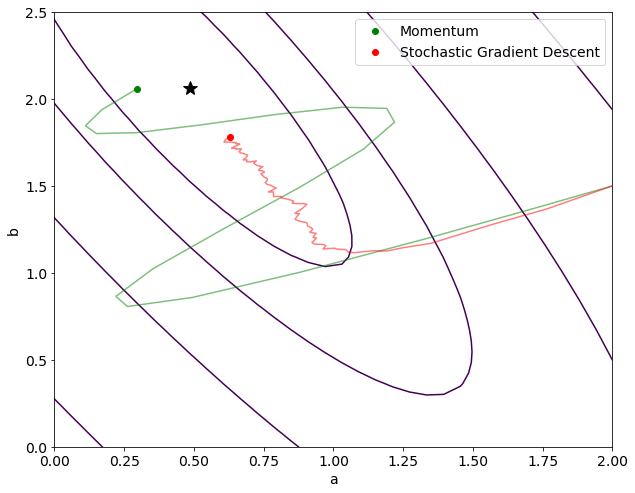

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de costo
def J(a, b, X, y):
    m = len(y)
    return 1/m * np.sum((y - a - b*X)**2)

# Calcular el gradiente de la función de costo
def gradJ(a, b, X, y):
    m = len(y)
    dA = -2/m * np.sum(y - a - b*X)
    dB = -2/m * np.sum((y - a - b*X)*X)
    return dA, dB

# Implementar algoritmo de optimización Gradient Descent
def gradient_descent(X, y, alpha=0.1, num_iterations=100):
    a = 2
    b = 1.5
    trace = [(a, b)]
    for i in range(num_iterations):
        dA, dB = gradJ(a, b, X, y)
        a = a - alpha*dA
        b = b - alpha*dB
        trace.append((a, b))
    return a, b, trace

# Implementar algoritmo de optimización Momentum
def momentum(X, y, alpha=0.1, gamma=0.9, num_iterations=100):
    a = 2
    b = 1.5
    vA = 0
    vB = 0
    trace = [(a, b)]
    for i in range(num_iterations):
        dA, dB = gradJ(a, b, X, y)
        vA = gamma*vA + alpha*dA
        vB = gamma*vB + alpha*dB
        a = a - vA
        b = b - vB
        trace.append((a, b))
    return a, b, trace

# Implementar algoritmo de optimización RMSprop
def rmsprop(X, y, alpha=0.1, gamma=0.9, epsilon=1e-8, num_iterations=100):
    a = 2
    b = 1.5
    sA = 0
    sB = 0
    trace = [(a, b)]
    for i in range(num_iterations):
        dA, dB = gradJ(a, b, X, y)
        sA = gamma*sA + (1 - gamma)*dA**2
        sB = gamma*sB + (1 - gamma)*dB**2
        a = a - alpha/(np.sqrt(sA) + epsilon)*dA
        b = b - alpha/(np.sqrt(sB) + epsilon)*dB
        trace.append((a, b))
    return a, b, trace

# Implementar algoritmo de optimización Adam
def adam(X, y, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=100):
    a = 2
    b = 1.5
    mA = 0
    mB = 0
    vA = 0
    vB = 0
    trace = [(a, b)]
    for i in range(num_iterations):
        dA, dB = gradJ(a, b, X, y)
        mA = beta1*mA + (1 - beta1)*dA
        mB = beta1*mB + (1 - beta1)*dB
        vA = beta2*vA + (1 - beta2)*dA**2
        vB = beta2*vB + (1 - beta2)*dB**2
        mAh = mA/(1 - beta1**(i+1))
        mBh = mB/(1 - beta1**(i+1))
        vAh = vA/(1 - beta2**(i+1))
        vBh = vB/(1 - beta2**(i+1))
        a = a - alpha/(np.sqrt(vAh) + epsilon)*mAh
        b = b - alpha/(np.sqrt(vBh) + epsilon)*mBh
        trace.append((a, b))
    return a, b, trace

# Implementar algoritmo de optimización Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, alpha=0.1, num_iterations=100, batch_size=10):
    a = 2
    b = 1.5
    trace = [(a, b)]
    m = len(y)
    for i in range(num_iterations):
        batch_indices = np.random.choice(m, size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        dA, dB = gradJ(a, b, X_batch, y_batch)
        a = a - alpha*dA
        b = b - alpha*dB
        trace.append((a, b))
    return a, b, trace

# Crear datos de ejemplo
m = 50
X = np.linspace(0, 1, m)
y = 2*X + 0.5 + np.random.randn(m)*0.1
num_iterations = 20


# Ejecutar los algoritmos de optimización
a_gd, b_gd, trace_gd = gradient_descent(X, y, num_iterations=num_iterations)
a_momentum, b_momentum, trace_momentum = momentum(X, y, num_iterations=20)
a_rmsprop, b_rmsprop, trace_rmsprop = rmsprop(X, y, num_iterations=50)
a_adam, b_adam, trace_adam = adam(X, y, num_iterations=60)
a_sgd, b_sgd, trace_sgd = stochastic_gradient_descent(X, y, num_iterations= 100)

# Crear malla de valores para evaluar la función de costo
A, B = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100))
C = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        C[i,j] = J(A[i,j], B[i,j], X, y)


# Graficar la función de costo y la traza de los diferentes algoritmos de optimización
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

plt.contour(A, B, C, levels=np.logspace(-1, 3, 10))
# plt.plot(a_gd, b_gd, 'bo', label='Gradient Descent')
# plt.plot([x[0] for x in trace_gd], [x[1] for x in trace_gd], 'b', alpha=0.5)
plt.plot(a_momentum, b_momentum, 'go', label='Momentum')
plt.plot([x[0] for x in trace_momentum], [x[1] for x in trace_momentum], 'g', alpha=0.5)
# plt.plot(a_rmsprop, b_rmsprop, 'yo', label='RMSprop')
# plt.plot([x[0] for x in trace_rmsprop], [x[1] for x in trace_rmsprop], 'y', alpha=0.5)
# plt.plot(a_adam, b_adam, 'mo', label='Adam')
# plt.plot([x[0] for x in trace_adam], [x[1] for x in trace_adam], 'm', alpha=0.5)
plt.plot(a_sgd, b_sgd, 'ro', label='Stochastic Gradient Descent')
plt.plot([x[0] for x in trace_sgd], [x[1] for x in trace_sgd], 'r', alpha=0.5)
# Obtener el mínimo de la función de costo
min_index = np.unravel_index(np.argmin(C), C.shape)
min_a, min_b = A[min_index], B[min_index]

# Graficar el punto mínimo con una estrella
plt.plot(min_a, min_b, marker='*', markersize=14, color='black')
plt.legend()
plt.xlabel('a')
plt.ylabel('b')
plt.xlim(0, 2)
plt.ylim(0, 2.5)
plt.show()